<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [14]:
import re
import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import spacy
import seaborn as sns

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [3]:
##### Your Code Here #####
df = pd.read_csv('data/job_listings.csv', encoding='utf-8')
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


## 2) Use Spacy to tokenize / clean the listings 

In [4]:
##### Your Code Here #####
def clean_html(text):
    text = re.sub(r'<div>|</div>|<br/>|<ul>|<li>|<p>|</p>|</ul>|<n>|</n>|^\'b\"|\\\\n|</li>|/', '', text)
    text = re.sub(r'[^a-zA-Z ^0-9]|/', ' ', text)
    return text

# df['description'] = df['description'].apply(lambda x: re.sub(r'<.*?>', ' ', x)).str.lower().str.split()
df['tokens'] = df['description'].apply(clean_html)
df.head()

,Unnamed: 0,description,title,tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,b Job Requirements nConceptual understanding ...
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,b Job Description n nAs a Data Scientist 1 yo...
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,b As a Data Scientist you will be working on c...
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,b div class jobsearch JobMetadataHeader icl ...
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,b Location USA xe2 x80 x93 multiple location...


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [5]:
##### Your Code Here #####
import spacy

nlp = spacy.load("en_core_web_lg")

def spacy_tokenizer(doc):
    tokens = []
    doc = nlp(doc)
    for token in doc:
        if((token.is_punct==False)&(token.is_stop==False)):
           tokens.append(token.lemma_.strip())
    return tokens

In [6]:
from sklearn.feature_extraction.text import CountVectorizer

cvect = CountVectorizer(stop_words='english',lowercase=False)
dtm = cvect.fit_transform(df['tokens'])

In [7]:
dtm = pd.DataFrame(dtm.todense(),columns=cvect.get_feature_names())
dtm

,00,000,02115,031819,032519,0356,04,041819,062,06366,...,year,years,yearsexperience,yes,yield,young,yrs,zero,zones,zoom
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421,0,0,0,0,0,0,0,0,0,0,...,2,3,0,0,0,0,0,0,0,0
422,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
423,0,2,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,1,0,0
424,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [9]:
##### Your Code Here #####
word_totals = dtm.sum(axis=0)

In [10]:
top20_words = word_totals.sort_values(ascending=False)[:20]

In [11]:
top20df = pd.DataFrame(top20_words).reset_index()

In [12]:
top20df['index'].values

array(['data', 'xe2', 'x80', 'business', 'experience', 'work', 'team',
       'Data', 'learning', 'We', 'analysis', 'models', 'nExperience',
       'skills', 'machine', 'x99s', 'science', 'statistical', 'class',
       'solutions'], dtype=object)

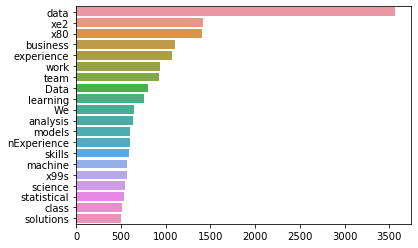

In [15]:
sns.barplot(y=top20df['index'].values,x=top20df[0].values)

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [16]:
##### Your Code Here #####
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(stop_words='english')

dtm = tfidf.fit_transform(df['description'])

dtm = pd.DataFrame(dtm.todense(), columns=tfidf.get_feature_names())

dtm.head()

,00,000,02115,03,0356,04,057,062,06366,08,...,zero,zeus,zf,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.095122,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [17]:
##### Your Code Here #####
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                 metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                 radius=1.0)

In [19]:
my_job_desc = ["I'd like to have a job that pays more than 100k either in data engineering or machine learning. Eventually, I want to break in to artificial intelligence"]

new = tfidf.transform(my_job_desc)

nn.kneighbors(new.todense())

(array([[1.34457077, 1.34474492, 1.34718151, 1.35369623, 1.35969758]]),
 array([[ 84,  51,  19, 237, 162]]))

In [22]:
# Checking the nearest neighbor
df['tokens'][84]

'b  div class  jobsearch JobMetadataHeader icl u xs mb  md   div class  jobsearch JobMetadataHeader item icl u xs mt  xs  InternshipData Scientist Intern n nAre you someone interested in applying your knowledge and experience about machine learning and artificial intelligence onto real applications  Then here  s your chance to be a Data Scientist Intern on the Research and Development team at HCSS  n nBeing a software company in the construction realm  we  re constantly innovating and playing with the latest tools  providing high quality support for our customers while providing a great work life balance for our employees  n nWhat are you expected to do  n n nParticipate in efforts to create software to perform data analysis that will include  nArtificial Intelligence modeling nData mining nDesigning and implementing deployment to include API n n b Requirements  b  n nKnowledge of Python programing nFamiliarity with AI modeling libraries like TensorFlow and Keras nFamiliarity with quer

## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 